Подготовка к работе с данными                                                                                            


Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
plt.rcParams["figure.figsize"] = (10.0, 7.0)

Для начала загружаем данные из таблиц:  Cheaters, Platforms,  ABgroup и формируем DataFrame

In [2]:
cheaters_df = pd.read_csv('Cheaters.csv')
platforms_df = pd.read_csv('Platforms.csv')
abgroup_df = pd.read_csv('ABgroup.csv')
money_df = pd.read_csv('Money.csv')
cash_df = pd.read_csv('Cash.csv')

Далее убедимся, что в датафреймах нет повторяющихся строк. Особенно это касается cheaters_df, platform_df и abgroup_df так как данные должны быть уникальны.

In [3]:
cheaters_unique = cheaters_df.drop_duplicates(subset=['user_id'])
platforms_unique = platforms_df.drop_duplicates(subset=['user_id'])
abgroup_unique = abgroup_df.drop_duplicates(subset=['user_id'])

После удаления дубликатов мы можем посчитать количество известных нам читеров, их количество составило 353.

In [4]:
count_ch = cheaters_unique['cheaters'].sum()
print(count_ch)

353


Создадим датафрейм с известными читерами

In [5]:
cheaters_true = cheaters_unique[cheaters_unique['cheaters'] == 1]
cheaters_true.count()

user_id     353
cheaters    353
dtype: int64

In [6]:

df_1 = money_df.merge(cash_df, on=['user_id','date'])

Теперь проверим суммы платежей (донатов) известных читеров и траты внутриигровой валюты

In [7]:
cheaters_payments = df_1.merge(cheaters_true, on='user_id')
cheaters_payments.groupby('user_id').agg('sum').describe()

,money,cash,cheaters
count,353.0,353.000000,353.0
mean,0.0,146807.932011,8.0
std,0.0,33800.925081,0.0
min,0.0,46700.000000,8.0
25%,0.0,125100.000000,8.0
50%,0.0,147200.000000,8.0
75%,0.0,169700.000000,8.0
max,0.0,253150.000000,8.0


Можем заметить, что читеры вообще не производят платежей (донатов)

Для сравнения проверим наличие платежей (донатов) у остальных игроков.



In [8]:
players = cheaters_unique[cheaters_unique['cheaters'] == 0]
players_payment = df_1.merge(players, on='user_id')


In [9]:
players_payment.describe()

,money,cash,cheaters
count,8.637176e+06,8.637176e+06,8637176.0
mean,7.492327e-01,7.576511e+02,0.0
std,7.923057e-01,7.716610e+02,0.0
min,0.000000e+00,0.000000e+00,0.0
25%,0.000000e+00,2.500000e+02,0.0
50%,9.900000e-01,7.000000e+02,0.0
75%,9.900000e-01,1.150000e+03,0.0
max,9.990000e+00,1.377500e+05,0.0


Сгруппируем данные по номеру игроков и получим суммарные траты за период акции 

In [10]:
players_payment.groupby('user_id').agg('sum')[['cash', 'money']].describe()

,cash,money
count,1.079647e+06,1.079647e+06
mean,6.061209e+03,5.993862e+00
std,3.004201e+03,1.902327e+00
min,5.000000e+01,0.000000e+00
25%,5.050000e+03,4.950000e+00
50%,6.000000e+03,5.950000e+00
75%,6.950000e+03,6.950000e+00
max,2.409500e+05,1.693000e+01


Посмотрим медианы читеров и обычных игроков

In [11]:
print(cheaters_payments.groupby('user_id').agg('sum')[['cash', 'money']].median())
print(players_payment.groupby('user_id').agg('sum')[['cash', 'money']].median())

cash     147200.0
money         0.0
dtype: float64
cash     6000.00
money       5.95
dtype: float64


Заметим, что траты обычных игроков и читеров значительно отличаются. При этом читеры не покупают валюту.

Найдем тех, у кого большие траты внутриигровой валюты, но при этом ее не покупали

In [12]:
player_level_95 = np.percentile(players_payment.groupby('user_id').agg('sum').cash, 95)

In [13]:
all_player = players_payment.groupby('user_id').agg('sum')

In [14]:
suspicious_player = all_player[(all_player['cash'] > player_level_95) & (all_player['money'] == 0)]
suspicious_player

,date,money,cash,cheaters
user_id,,,,
027YD0-7N2S50,12.07.202116.07.202117.07.202115.07.202111.07....,0.0,203400,0
091QZN-XYWQ8D,12.07.202110.07.202117.07.202116.07.202111.07....,0.0,78500,0
0E95BB-LTAHXQ,17.07.202111.07.202116.07.202110.07.202114.07....,0.0,166000,0
0GCX0G-5BZ6HE,14.07.202111.07.202115.07.202116.07.202112.07....,0.0,122650,0
0GH23F-XS6VSB,11.07.202112.07.202117.07.202110.07.202116.07....,0.0,152150,0
...,...,...,...,...
ZQNX2R-TGBYZ0,13.07.202111.07.202117.07.202115.07.202110.07....,0.0,147200,0
ZRQNJL-5G1WXO,17.07.202115.07.202116.07.202110.07.202111.07....,0.0,97950,0
ZUEJJE-KN8O77,14.07.202116.07.202111.07.202115.07.202112.07....,0.0,121400,0


Видим список игроков с подозрительно большими тратами,но при этом у них нет покупок валюты. Будем их также считать читерами

In [15]:
suspicious_player.reset_index(inplace=True)
suspicious_player

,user_id,date,money,cash,cheaters
0,027YD0-7N2S50,12.07.202116.07.202117.07.202115.07.202111.07....,0.0,203400,0
1,091QZN-XYWQ8D,12.07.202110.07.202117.07.202116.07.202111.07....,0.0,78500,0
2,0E95BB-LTAHXQ,17.07.202111.07.202116.07.202110.07.202114.07....,0.0,166000,0
3,0GCX0G-5BZ6HE,14.07.202111.07.202115.07.202116.07.202112.07....,0.0,122650,0
4,0GH23F-XS6VSB,11.07.202112.07.202117.07.202110.07.202116.07....,0.0,152150,0
...,...,...,...,...,...
339,ZQNX2R-TGBYZ0,13.07.202111.07.202117.07.202115.07.202110.07....,0.0,147200,0
340,ZRQNJL-5G1WXO,17.07.202115.07.202116.07.202110.07.202111.07....,0.0,97950,0
341,ZUEJJE-KN8O77,14.07.202116.07.202111.07.202115.07.202112.07....,0.0,121400,0
342,ZVKT51-78VHI9,16.07.202115.07.202117.07.202112.07.202110.07....,0.0,214500,0


Теперь присвоим новым выявленным читерам значение 1 в столбце cheaters

In [16]:
cheaters_unique.loc[cheaters_unique['user_id'].isin(suspicious_player['user_id']), 'cheaters'] = 1

Перезапишим датафрейм player, в котором не будет читеров. Также добавим к нему разделение по группам

In [17]:
players = cheaters_unique[cheaters_unique['cheaters'] == 0].merge(abgroup_unique, on = 'user_id')

Анализ полученных данных

Разделим игроков на группы и сразу добавим их платежи и платформу

In [18]:
test_group = players[players['group'] == 'test']\
.merge(money_df, on = ['user_id'])
control_group = players[players['group'] == 'control']\
.merge(money_df, on = ['user_id'])

Прежде чем считать метрики, взглянем на графики и проверим их симметричность и эксцесс. Для упрощения будем использовать функцию, которая находит средние, квартили, медиану, моду, стандартное отклонение, эксцесс, ассиметрию и рисует график. График будет показывать количество игроков (y) и сколько они суммарно задонатили за период теста по оси х

In [19]:
def researh(df, column, color = 'blue', text = 'график распределения'):
    print("Базовые метрики")
    print(df[column].describe())
    print('Медиана - ', df[column].median())
    print("------------------------------------")
    
    print("Самые популярные значения метрики, топ 5")
    print(df[column].value_counts().nlargest(5))
    print("------------------------------------")
    
    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))
    
    plot = sb.histplot(df[column], color = color, bins=15,  binwidth= 1);
    plot.set_title(text)
    plt.show()

Тестовая группа

Базовые метрики
count    539312.000000
mean          6.162276
std           1.910851
min           0.000000
25%           4.950000
50%           5.950000
75%           6.960000
max          16.930000
Name: money, dtype: float64
Медиана -  5.95
------------------------------------
Самые популярные значения метрики, топ 5
money
5.95    55860
4.96    49457
6.95    40198
3.96    36292
6.94    35217
Name: count, dtype: int64
------------------------------------
Эксцесс  0.026747177605952466
Ассиметрия  0.23717022914455232


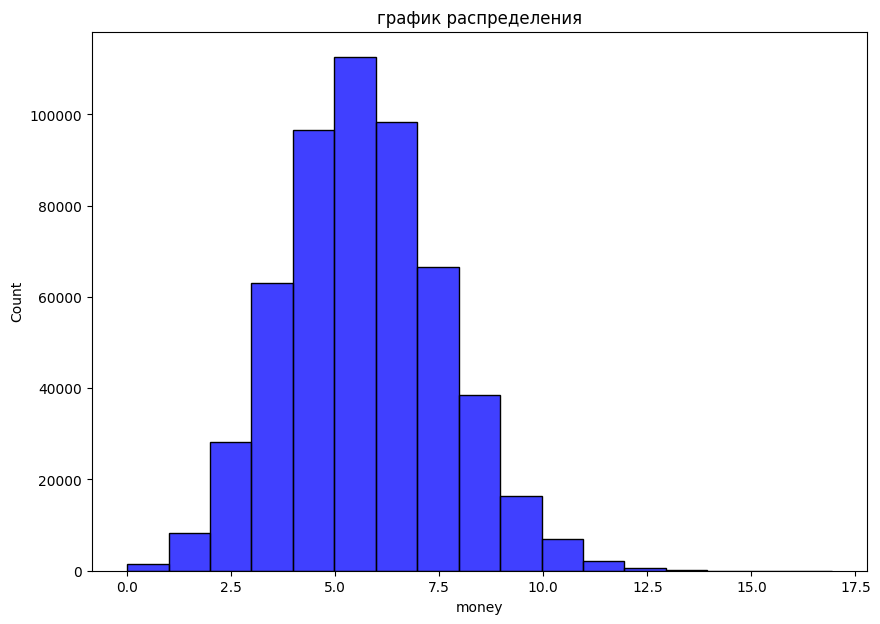

In [20]:
researh(test_group.groupby('user_id').agg('sum'), 'money')

Заметим, что есть ассимтерия, но в целом распределение похоже на нормальное.

Контрольная группа

Базовые метрики
count    539991.000000
mean          5.829478
std           1.873622
min           0.000000
25%           4.950000
50%           5.950000
75%           6.950000
max          15.930000
Name: money, dtype: float64
Медиана -  5.95
------------------------------------
Самые популярные значения метрики, топ 5
money
5.95    55576
4.96    54557
3.96    42771
4.95    37251
6.95    37051
Name: count, dtype: int64
------------------------------------
Эксцесс  0.006912261917506601
Ассиметрия  0.22888980004466286


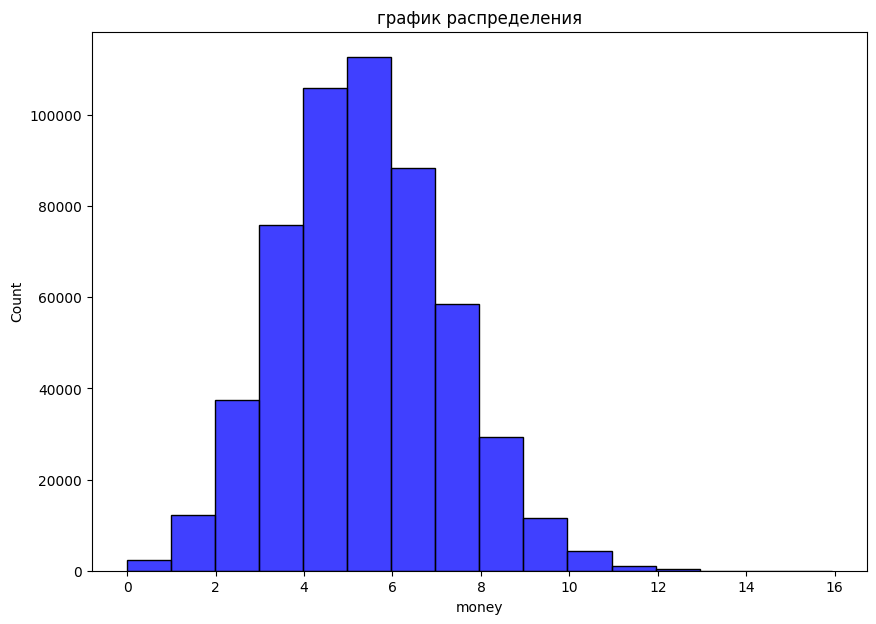

In [21]:
researh(control_group.groupby('user_id').agg('sum'), 'money')

Можно сделать вывод, что практически все игроки сделали донат хотя бы 1 раз за период теста.
Но посмотрим сколько было не платящих игроков


In [22]:
print((test_group.groupby('user_id').agg('sum')['money'] == 0).sum())

76


Всего 76 игроков не донатили за период теста

Рассчитаем ARPU

Рассчитаем суммы платежей для каждой группы

In [23]:
print('Сумма платежей тестовой группы: ', test_group_sum := test_group.money.sum())
print('Сумма платежей контрольной группы: ', control_group_sum := control_group.money.sum())

Сумма платежей тестовой группы:  3323389.1799999946
Сумма платежей контрольной группы:  3147865.7900000024


In [24]:
ARPU_test = test_group_sum / test_group.drop_duplicates('user_id').count()[0]
ARPU_control = control_group_sum / control_group.drop_duplicates('user_id').count()[0]
print('ARPU тестовой группы - ', ARPU_test, '\n', 'ARPU контрольной группы - ', ARPU_control)

ARPU тестовой группы -  6.162275602990467 
 ARPU контрольной группы -  5.829478250563439


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\3014617449.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARPU_test = test_group_sum / test_group.drop_duplicates('user_id').count()[0]
C:\Users\petru\AppData\Local\Temp\ipykernel_12796\3014617449.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARPU_control = control_group_sum / control_group.drop_duplicates('user_id').count()[0]


Также найдем их доверительные интервалы , возьмем доверительную вероятность 95%

In [25]:
def confidence(df, column, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [26]:
test_confidence = confidence(test_group.groupby('user_id').agg('sum'), 'money')
print('Доверительный интервал тестовой группы', test_confidence)
control_confidence = confidence(control_group.groupby('user_id').agg('sum'), 'money')
print('Доверительный интервал контрольной группы', control_confidence)


Доверительный интервал тестовой группы (np.float64(2.4170771425285396), np.float64(9.907474063452419))
Доверительный интервал контрольной группы (np.float64(2.1572457079500182), np.float64(9.501710793176855))


Несмотря на то, что разница между группами существует, она невелика, причем доверительные интервалы практически полностью накладываются друг на друга. Это позволяет предположить, что полученный эффект скорее всего обусловлен случайностью.

In [27]:
print('ARPU тестовой группы больше контрольной на', round((ARPU_test - ARPU_control) / ARPU_control * 100, 1),'%')

ARPU тестовой группы больше контрольной на 5.7 %


Рассчитаем ARPPU 

Для этого сначала отделим платящих игроков

In [28]:
df = test_group.groupby('user_id').agg('sum').reset_index()
test_group_paying = df[df['money'] > 0]
df = control_group.groupby('user_id').agg('sum').reset_index()
control_group_paying = df[df['money'] > 0]

Базовые метрики
count    539236.000000
mean          6.163144
std           1.909584
min           0.990000
25%           4.950000
50%           5.950000
75%           6.960000
max          16.930000
Name: money, dtype: float64
Медиана -  5.95
------------------------------------
Самые популярные значения метрики, топ 5
money
5.95    55860
4.96    49457
6.95    40198
3.96    36292
6.94    35217
Name: count, dtype: int64
------------------------------------
Эксцесс  0.01948786963720961
Ассиметрия  0.24104777717750522


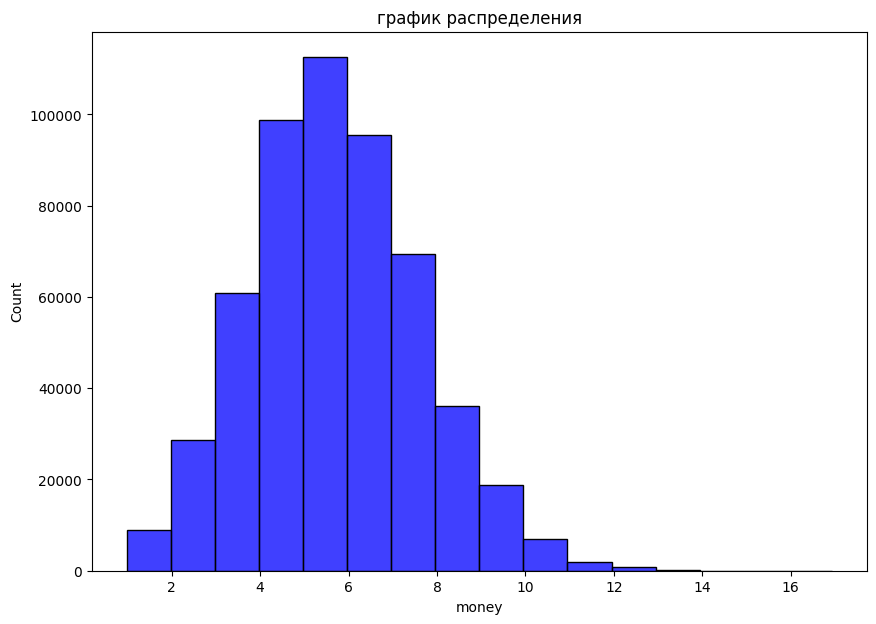

In [29]:
researh(test_group_paying, 'money')

Базовые метрики
count    539840.000000
mean          5.831109
std           1.871346
min           0.990000
25%           4.950000
50%           5.950000
75%           6.950000
max          15.930000
Name: money, dtype: float64
Медиана -  5.95
------------------------------------
Самые популярные значения метрики, топ 5
money
5.95    55576
4.96    54557
3.96    42771
4.95    37251
6.95    37051
Name: count, dtype: int64
------------------------------------
Эксцесс  -0.004748696740484171
Ассиметрия  0.23563197648757012


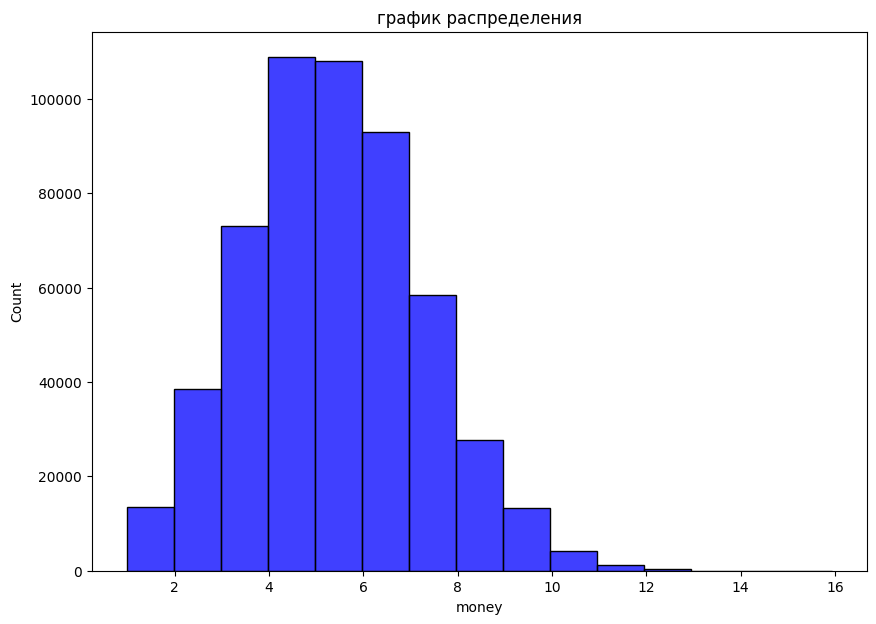

In [30]:
researh(control_group_paying, 'money')

In [31]:
ARPPU_test = test_group_sum / test_group_paying.drop_duplicates('user_id').count()[0]
ARPPU_control = control_group_sum / control_group_paying.drop_duplicates('user_id').count()[0]
print('ARPPU тестовой группы - ', ARPPU_test, '\n', 'ARPPU контрольной группы - ', ARPPU_control)

C:\Users\petru\AppData\Local\Temp\ipykernel_12796\4041125954.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARPPU_test = test_group_sum / test_group_paying.drop_duplicates('user_id').count()[0]


ARPPU тестовой группы -  6.163144115007149 
 ARPPU контрольной группы -  5.831108828541795


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\4041125954.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARPPU_control = control_group_sum / control_group_paying.drop_duplicates('user_id').count()[0]


In [32]:
test_paying_confidence = confidence(test_group_paying.groupby('user_id').agg('sum'), 'money')
print('Доверительный интервал тестовой группы', test_paying_confidence)
control_paying_confidence = confidence(control_group_paying.groupby('user_id').agg('sum'), 'money')
print('Доверительный интервал контрольной группы', control_paying_confidence)

Доверительный интервал тестовой группы (np.float64(2.4204277288673626), np.float64(9.905860501146952))
Доверительный интервал контрольной группы (np.float64(2.163338538240738), np.float64(9.498879118842845))


In [33]:
print('ARPPU тестовой группы больше контрольной на', round((ARPPU_test - ARPPU_control) / ARPPU_control * 100, 1),'%')

ARPPU тестовой группы больше контрольной на 5.7 %


Доверительные интервалы перекрываются по обоим показателям, что свидетельствует о вероятной случайности полученных результатов. Возможно, акция оказывает влияние, однако оно незначительное и нестабильное.

Проверим те же метрики для групп разных платформ.

In [34]:

test_group_PC = platforms_unique[platforms_unique['platform'] == 'PC'].merge(test_group, on='user_id')
test_group_PS4 = platforms_unique[platforms_unique['platform'] == 'PS4'].merge(test_group, on='user_id')
test_group_Xbox = platforms_unique[platforms_unique['platform'] == 'XBox'].merge(test_group, on='user_id')
control_group_PC = platforms_unique[platforms_unique['platform'] == 'PC'].merge(control_group, on='user_id')
control_group_PS4 = platforms_unique[platforms_unique['platform'] == 'PS4'].merge(control_group, on='user_id')
control_group_Xbox = platforms_unique[platforms_unique['platform'] == 'XBox'].merge(control_group, on='user_id')

Создадим  функцию  для исследования

In [35]:
def aru(df, column): # Поиск ARPU или ARPPU (зависит от подаваемого датафрейма)
    print('Сумма', df[column].sum())
    ARU = df[column].sum() / df.drop_duplicates('user_id').count()[0]
    print(ARU)

def intervals(df, column, alpha = 0.95): # Поиск дов. интервала
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    print('Доверительный интервал', interval)
    
def all_research(df, column = 'money', alpha = 0.95):
    
    df_all = df.groupby('user_id').agg('sum').reset_index()
    researh(df_all, column, color = 'blue', text = 'Все игроки группы')
    print('ARPU')
    aru(df_all, column)
    intervals(df_all, column, alpha)

    dfs = df.groupby('user_id').agg('sum').reset_index()  # вычленение платящих игроков (те у кого донаты больше 0)
    df_p = dfs[dfs['money'] > 0]
    print('-'* 20)
    print('-'* 20, end = '\n' * 3)
    
    print('Метрики платящих игроков')
    
    researh(df_p, column, color = 'yellow', text = 'Платящие игроки группы')   
    print('ARPPU')
    aru(df_p, column)
    intervals(df_p, column, alpha = 0.95)
    

Описание тестовой группы игроков на ПК

Базовые метрики
count    179820.000000
mean          6.269046
std           1.929597
min           0.000000
25%           4.960000
50%           5.960000
75%           7.930000
max          16.930000
Name: money, dtype: float64
Медиана -  5.96
------------------------------------
Самые популярные значения метрики, топ 5
money
5.95    18850
4.96    15995
6.95    13609
6.94    12138
3.96    11562
Name: count, dtype: int64
------------------------------------
Эксцесс  0.04797887632809106
Ассиметрия  0.24937041981274452


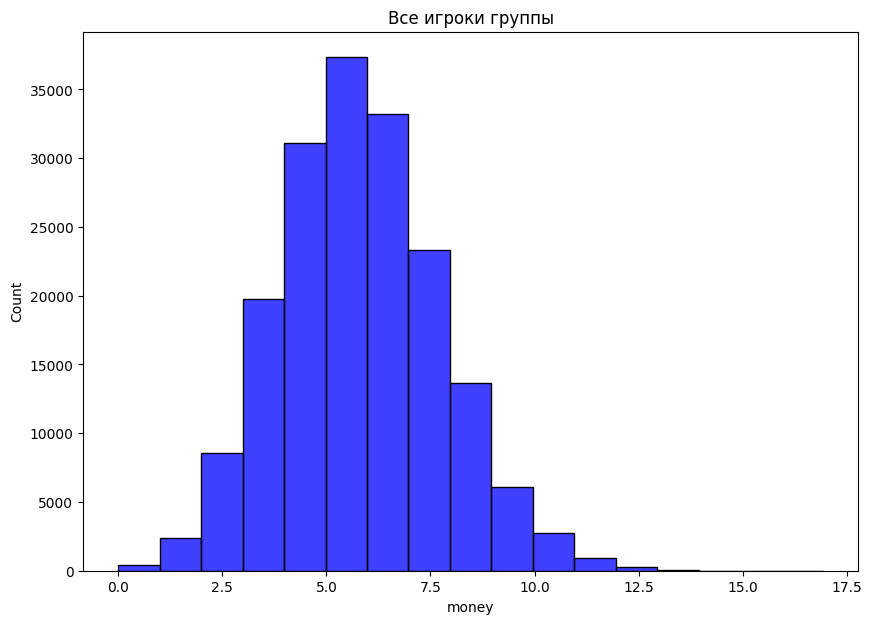

ARPU
Сумма 1127299.88
6.269046157268379
Доверительный интервал (np.float64(2.487105299492049), np.float64(10.05098701504471))


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\1096050072.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARU = df[column].sum() / df.drop_duplicates('user_id').count()[0]


--------------------
--------------------


Метрики платящих игроков
Базовые метрики
count    179800.000000
mean          6.269743
std           1.928571
min           0.990000
25%           4.960000
50%           5.960000
75%           7.930000
max          16.930000
Name: money, dtype: float64
Медиана -  5.96
------------------------------------
Самые популярные значения метрики, топ 5
money
5.95    18850
4.96    15995
6.95    13609
6.94    12138
3.96    11562
Name: count, dtype: int64
------------------------------------
Эксцесс  0.04202343693785204
Ассиметрия  0.25253229675619193


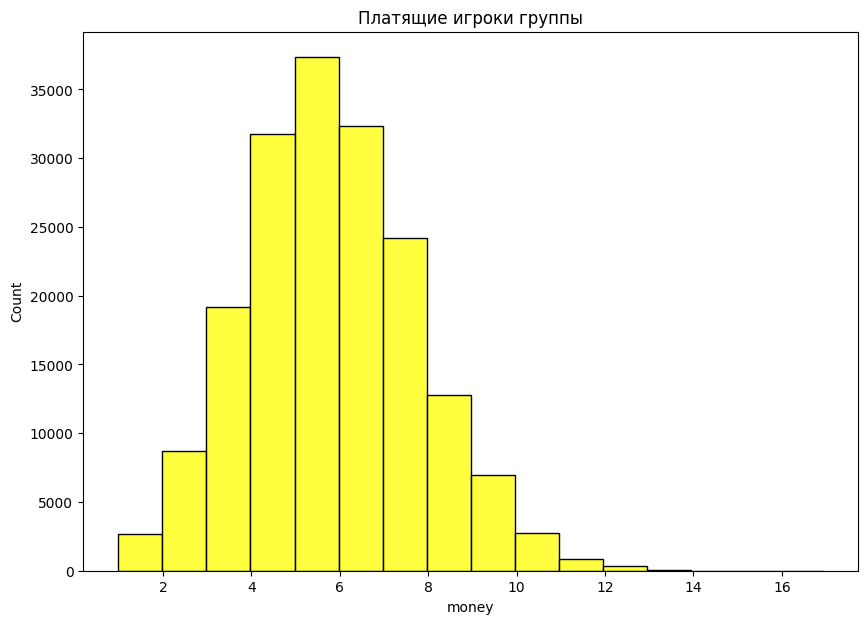

ARPPU
Сумма 1127299.8800000001
6.269743492769745
Доверительный интервал (np.float64(2.4898132993658173), np.float64(10.049673686173673))


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\1096050072.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARU = df[column].sum() / df.drop_duplicates('user_id').count()[0]


In [36]:
all_research(test_group_PC)

Описание контрольной группы игроков на ПК

Базовые метрики
count    179732.000000
mean          5.646201
std           1.816853
min           0.000000
25%           3.970000
50%           5.940000
75%           6.950000
max          14.920000
Name: money, dtype: float64
Медиана -  5.9399999999999995
------------------------------------
Самые популярные значения метрики, топ 5
money
4.96    19237
5.95    18918
3.96    15515
4.95    12858
6.95    11808
Name: count, dtype: int64
------------------------------------
Эксцесс  0.007294703110581668
Ассиметрия  0.20938340950020856


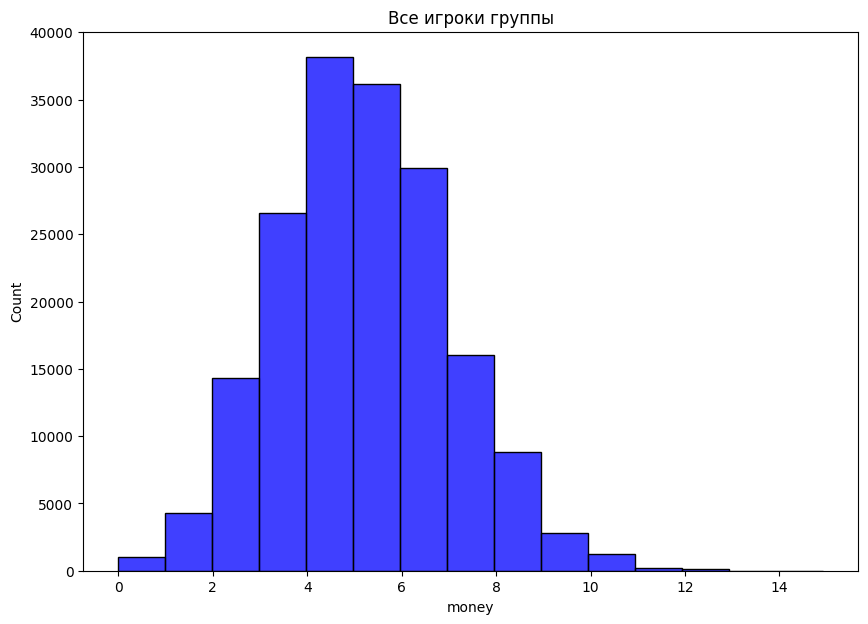

ARPU
Сумма 1014803.06
5.6462013442236225
Доверительный интервал (np.float64(2.0852347204456825), np.float64(9.207167968001563))


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\1096050072.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARU = df[column].sum() / df.drop_duplicates('user_id').count()[0]


--------------------
--------------------


Метрики платящих игроков
Базовые метрики
count    179665.000000
mean          5.648307
std           1.813917
min           0.990000
25%           3.970000
50%           5.940000
75%           6.950000
max          14.920000
Name: money, dtype: float64
Медиана -  5.9399999999999995
------------------------------------
Самые популярные значения метрики, топ 5
money
4.96    19237
5.95    18918
3.96    15515
4.95    12858
6.95    11808
Name: count, dtype: int64
------------------------------------
Эксцесс  -0.008085001731901187
Ассиметрия  0.21824495829613558


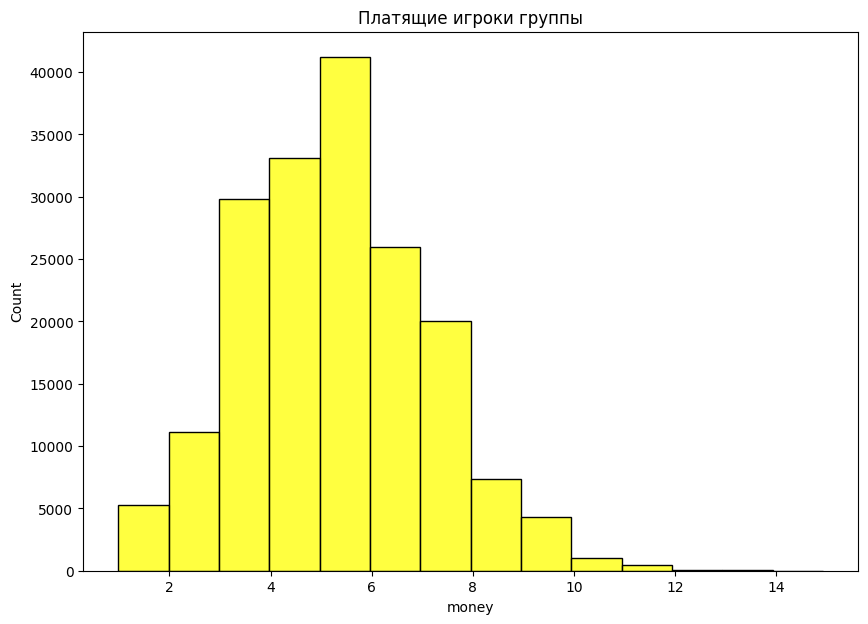

ARPPU
Сумма 1014803.0599999999
5.64830690451674
Доверительный интервал (np.float64(2.0930958095566727), np.float64(9.203517999476807))


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\1096050072.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARU = df[column].sum() / df.drop_duplicates('user_id').count()[0]


In [37]:
all_research(control_group_PC)

ARPU и ARPPU также выше у тестовой группы для игроков на ПК

Описание тестовой группы игроков на PS4

Базовые метрики
count    179415.000000
mean          6.084883
std           1.885032
min           0.000000
25%           4.950000
50%           5.950000
75%           6.960000
max          15.940000
Name: money, dtype: float64
Медиана -  5.95
------------------------------------
Самые популярные значения метрики, топ 5
money
5.95    18512
4.96    16961
6.95    13321
3.96    12532
4.95    11722
Name: count, dtype: int64
------------------------------------
Эксцесс  0.005903475589768448
Ассиметрия  0.21822758720072233


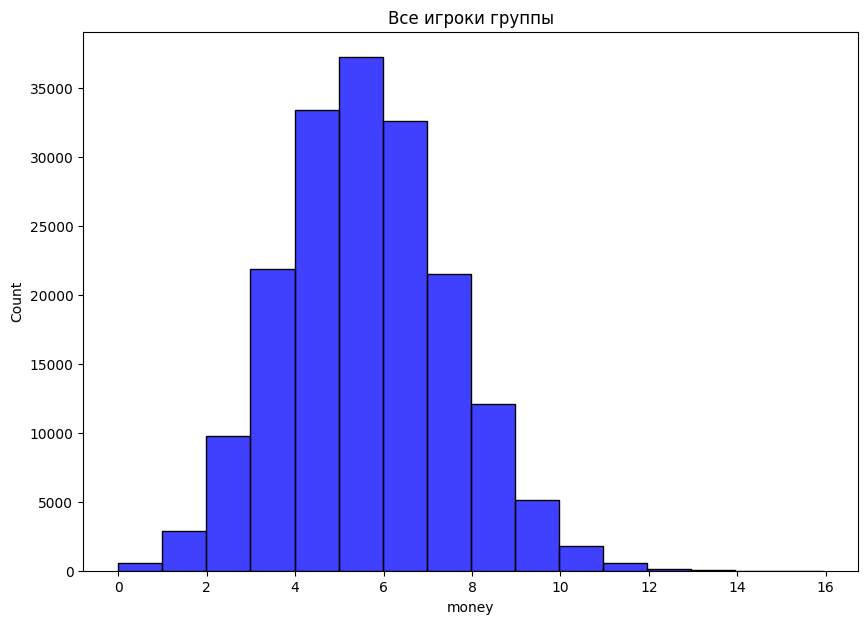

ARPU
Сумма 1091719.2100000002
6.08488259064181
Доверительный интервал (np.float64(2.3902870056309937), np.float64(9.779478175652626))


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\1096050072.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARU = df[column].sum() / df.drop_duplicates('user_id').count()[0]


--------------------
--------------------


Метрики платящих игроков
Базовые метрики
count    179386.000000
mean          6.085866
std           1.883596
min           0.990000
25%           4.950000
50%           5.950000
75%           6.960000
max          15.940000
Name: money, dtype: float64
Медиана -  5.95
------------------------------------
Самые популярные значения метрики, топ 5
money
5.95    18512
4.96    16961
6.95    13321
3.96    12532
4.95    11722
Name: count, dtype: int64
------------------------------------
Эксцесс  -0.0025045069911668882
Ассиметрия  0.22264586897913705


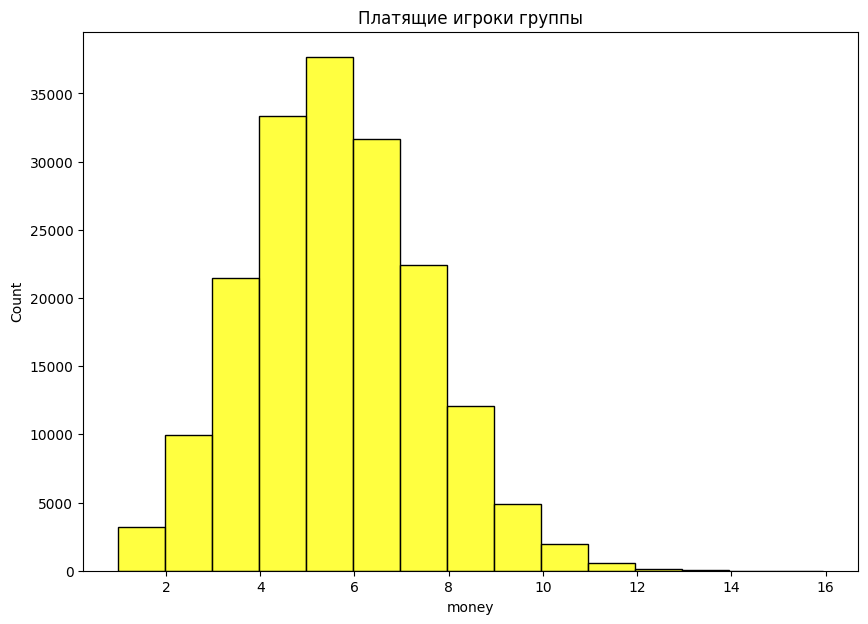

ARPPU
Сумма 1091719.21
6.085866288339112
Доверительный интервал (np.float64(2.394085465878397), np.float64(9.777647110799826))


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\1096050072.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARU = df[column].sum() / df.drop_duplicates('user_id').count()[0]


In [38]:
all_research(test_group_PS4)

Описание контрольнойгруппы игроков на PS4

Базовые метрики
count    179804.000000
mean          5.737647
std           1.867068
min           0.000000
25%           3.980000
50%           5.950000
75%           6.950000
max          14.920000
Name: money, dtype: float64
Медиана -  5.95
------------------------------------
Самые популярные значения метрики, топ 5
money
4.96    18389
5.95    18113
3.96    14827
4.95    12557
6.95    11980
Name: count, dtype: int64
------------------------------------
Эксцесс  -0.03658336978708654
Ассиметрия  0.21783101352028067


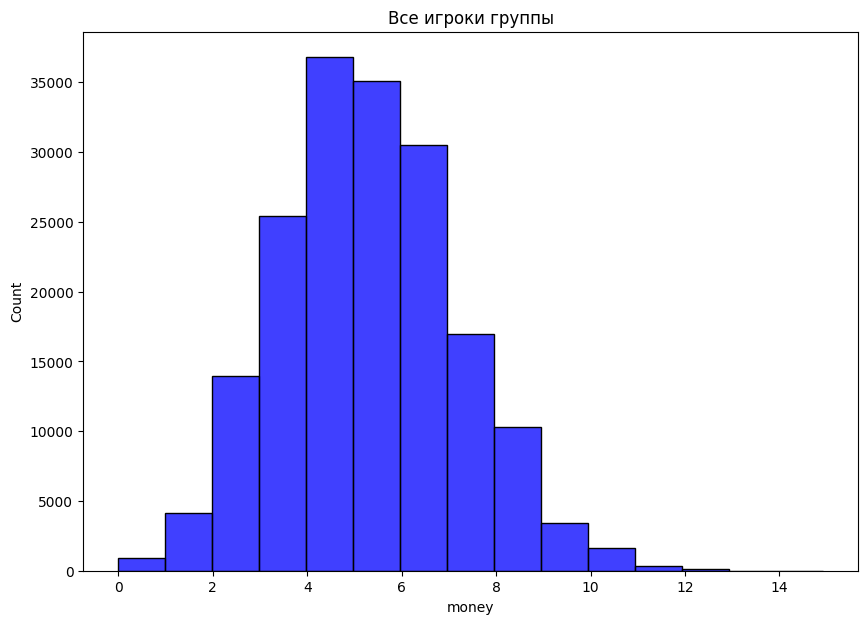

ARPU
Сумма 1031651.8699999999
5.73764693777669
Доверительный интервал (np.float64(2.078261143658351), np.float64(9.39703273189503))


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\1096050072.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARU = df[column].sum() / df.drop_duplicates('user_id').count()[0]


--------------------
--------------------


Метрики платящих игроков
Базовые метрики
count    179747.000000
mean          5.739466
std           1.864566
min           0.990000
25%           3.980000
50%           5.950000
75%           6.950000
max          14.920000
Name: money, dtype: float64
Медиана -  5.95
------------------------------------
Самые популярные значения метрики, топ 5
money
4.96    18389
5.95    18113
3.96    14827
4.95    12557
6.95    11980
Name: count, dtype: int64
------------------------------------
Эксцесс  -0.04901753694799815
Ассиметрия  0.22509134946442036


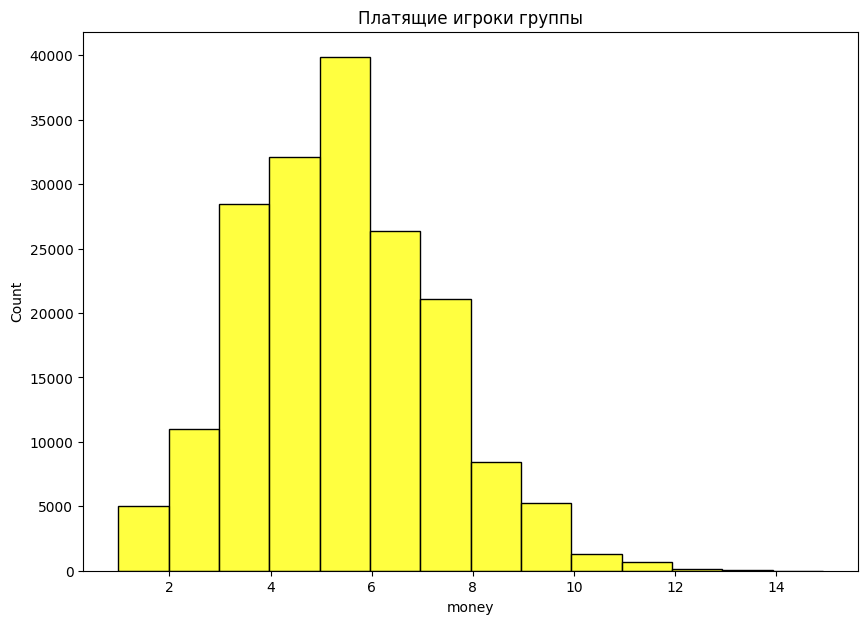

ARPPU
Сумма 1031651.87
5.739466416685675
Доверительный интервал (np.float64(2.0849849290883453), np.float64(9.393947904283003))


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\1096050072.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARU = df[column].sum() / df.drop_duplicates('user_id').count()[0]


In [39]:
all_research(control_group_PS4)

Значения показателей ARPU и ARPPU в тестовой группе превышают аналогичные показатели контрольной группы, однако остаются ниже значений, характерных для группы игроков на платформе ПК.

Описание тестовой группы игроков на XBox

Базовые метрики
count    180077.000000
mean          6.132766
std           1.912830
min           0.000000
25%           4.950000
50%           5.950000
75%           6.960000
max          15.920000
Name: money, dtype: float64
Медиана -  5.95
------------------------------------
Самые популярные значения метрики, топ 5
money
5.95    18498
4.96    16501
6.95    13268
3.96    12198
4.95    11751
Name: count, dtype: int64
------------------------------------
Эксцесс  0.012458503010370325
Ассиметрия  0.23785999509845931


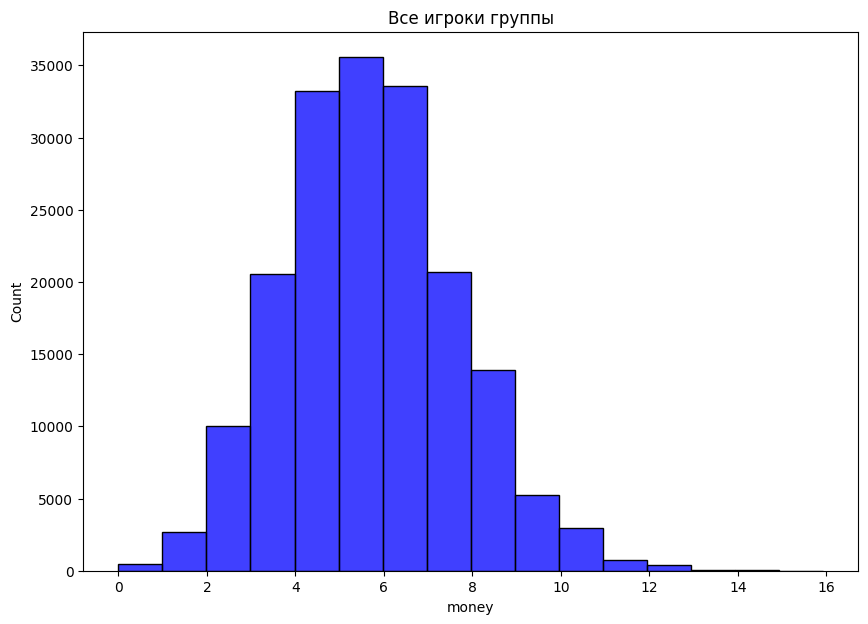

ARPU
Сумма 1104370.09


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\1096050072.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARU = df[column].sum() / df.drop_duplicates('user_id').count()[0]


6.1327659279086175
Доверительный интервал (np.float64(2.3836876747421654), np.float64(9.88184418107507))
--------------------
--------------------


Метрики платящих игроков
Базовые метрики
count    180050.000000
mean          6.133686
std           1.911499
min           0.990000
25%           4.950000
50%           5.950000
75%           6.960000
max          15.920000
Name: money, dtype: float64
Медиана -  5.95
------------------------------------
Самые популярные значения метрики, топ 5
money
5.95    18498
4.96    16501
6.95    13268
3.96    12198
4.95    11751
Name: count, dtype: int64
------------------------------------
Эксцесс  0.004957897919129817
Ассиметрия  0.24190226379422555


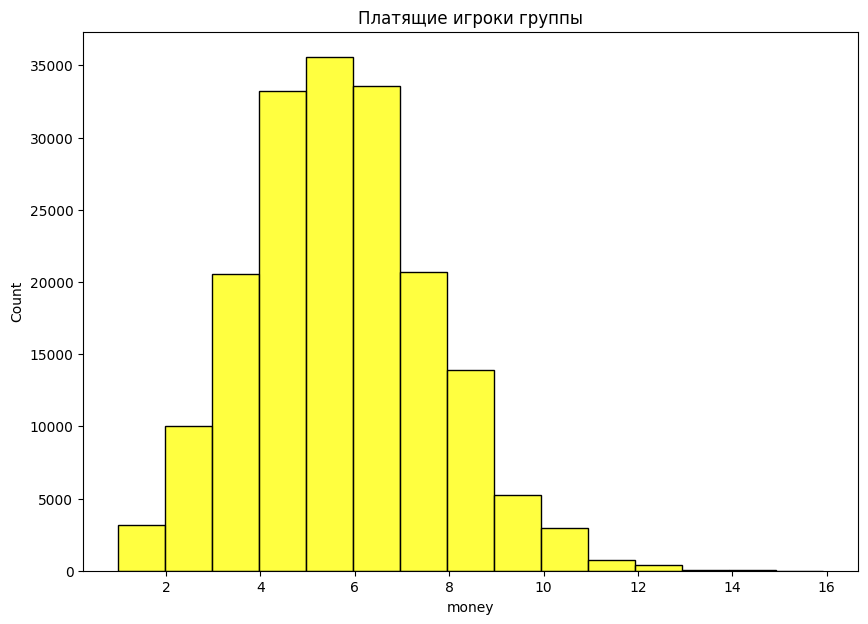

ARPPU
Сумма 1104370.0899999999
6.13368558733685
Доверительный интервал (np.float64(2.387217103485011), np.float64(9.88015407118869))


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\1096050072.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARU = df[column].sum() / df.drop_duplicates('user_id').count()[0]


In [40]:
all_research(test_group_Xbox)

описание контрольной группы игроков на XBox

Базовые метрики
count    180455.000000
mean          6.103521
std           1.904373
min           0.000000
25%           4.950000
50%           5.950000
75%           6.960000
max          15.930000
Name: money, dtype: float64
Медиана -  5.95
------------------------------------
Самые популярные значения метрики, топ 5
money
5.95    18545
4.96    16931
6.95    13263
3.96    12429
4.95    11836
Name: count, dtype: int64
------------------------------------
Эксцесс  0.007546259405377231
Ассиметрия  0.23325578640234226


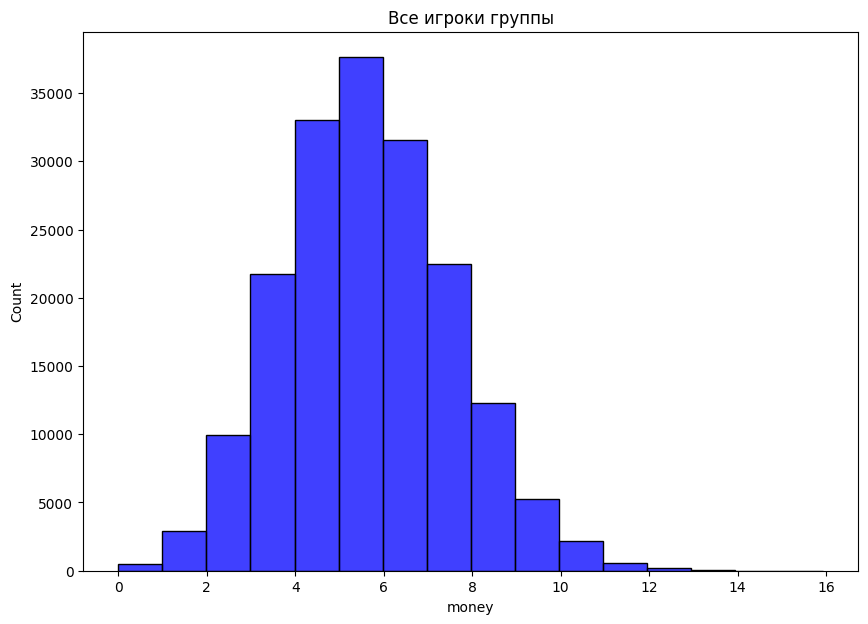

ARPU
Сумма 1101410.8599999999


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\1096050072.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARU = df[column].sum() / df.drop_duplicates('user_id').count()[0]


6.103520877781164
Доверительный интервал (np.float64(2.3710174206990544), np.float64(9.836024334863273))
--------------------
--------------------


Метрики платящих игроков
Базовые метрики
count    180428.000000
mean          6.104434
std           1.903052
min           0.990000
25%           4.950000
50%           5.950000
75%           6.960000
max          15.930000
Name: money, dtype: float64
Медиана -  5.95
------------------------------------
Самые популярные значения метрики, топ 5
money
5.95    18545
4.96    16931
6.95    13263
3.96    12429
4.95    11836
Name: count, dtype: int64
------------------------------------
Эксцесс  7.173932956971996e-05
Ассиметрия  0.23727420948058614


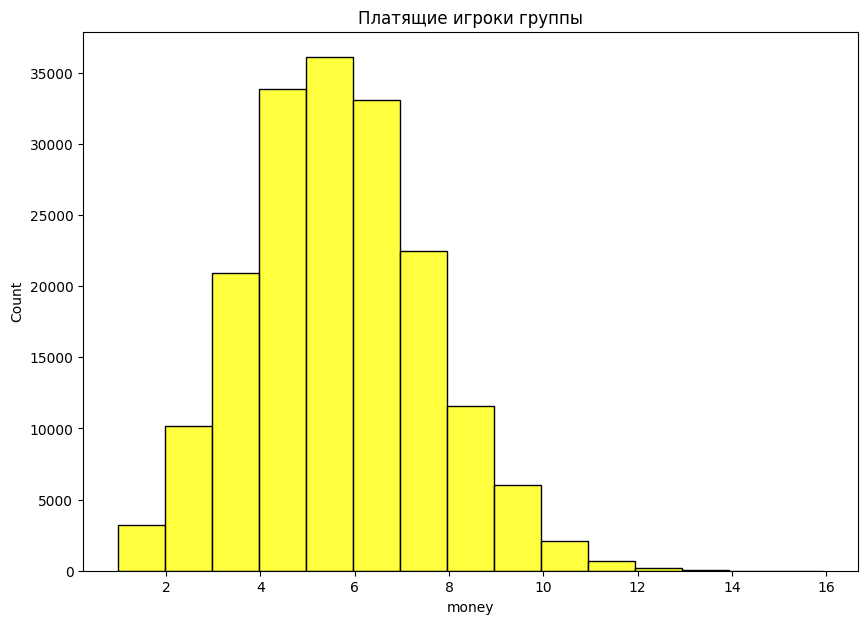

ARPPU
Сумма 1101410.8599999999
6.104434234154343
Доверительный интервал (np.float64(2.3745215562719557), np.float64(9.83434691203673))


C:\Users\petru\AppData\Local\Temp\ipykernel_12796\1096050072.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARU = df[column].sum() / df.drop_duplicates('user_id').count()[0]


In [41]:
all_research(control_group_Xbox)

Акция практически не оказала влияния на игроков Xbox. Наиболее заметный эффект наблюдался среди игроков на PC, тогда как игроки PlayStation 4 показали промежуточный результат.

Удалим неннужные нам датафреймы

In [ ]:
del all_player
del cheaters_df
del abgroup_df
del platforms_df
del players_payment

Создадим датафрейм, содержащий ежедневные показатели наших ключевых метрик, предназначенный впоследствии для экспорта в CSV-файл и дальнейшей обработки в Power BI.


Тестовая группа:

Для этого объединим данные игроков тестовой группы с данными трат внутриигровой валюты.

In [43]:
test_group_BI = test_group.merge(cash_df, on=['user_id', 'date'])

Для того, чтобы посчитать количество игроков, тративших внутриигровую валюту, добавим столбец pay_users в датафрейм, в котором проставим значение 1 , если были совершены траты валюты

In [44]:
test_group_BI['pay_users'] = np.where(test_group_BI['cash'] > 0, 1, 0)

Сгруппируем данные по дате, считаем количество игроков за каждую дату и добавляем соответствующий столбец в датафрейм

In [ ]:
test_group_BI = test_group_BI.groupby('date').agg('sum')

Удалим неактуальные столбцы

In [ ]:
test_group_BI = test_group_BI.drop(columns=['cheaters', 'group'])

Добавим столбец users, в котором посчитаем всех игроков тестовой группы

In [ ]:
test_group_BI['users'] = test_group.groupby('date').agg('count')['user_id'].iloc[1]

Рассчитаем ARPU и ARPPU для игроков тестовой группы

In [ ]:
test_group_BI['ARPU'] = test_group_BI['money'] / test_group_BI['users']

In [ ]:
test_group_BI['ARPPU'] = test_group_BI['money'] / test_group_BI['pay_users']

In [ ]:
test_group_BI = test_group_BI.drop(columns=['user_id'])
test_group_BI

,money,cash,pay_users,users,ARPU,ARPPU
date,,,,,,
10.07.2021,410341.94,439980100,523174,539312,0.760862,0.784332
11.07.2021,410937.94,440212450,523343,539312,0.761967,0.785217
12.07.2021,409077.72,437566350,522446,539312,0.758518,0.783005
13.07.2021,400947.80,428022700,517763,539312,0.743443,0.774385
14.07.2021,383022.82,402593600,501023,539312,0.710206,0.764482
15.07.2021,353538.54,356375500,462393,539312,0.655536,0.764585
16.07.2021,314611.74,290573050,398001,539312,0.583358,0.790480
17.07.2021,640910.68,564372300,324212,539312,1.188386,1.976826


Аналогичные действия проведем с данными для контрольной группы

Контрольная группа:

In [ ]:
control_group_BI = control_group.merge(cash_df, on=['user_id', 'date'])
control_group_BI['pay_users'] = np.where(control_group_BI['cash'] > 0, 1, 0)
control_group_BI = control_group_BI.groupby('date').agg('sum')
control_group_BI = control_group_BI.drop(columns=['cheaters', 'group'])
control_group_BI['users'] = control_group.groupby('date').agg('count')['user_id'].iloc[1]
control_group_BI['ARPU'] = control_group_BI['money'] / control_group_BI['users']
control_group_BI['ARPPU'] = control_group_BI['money'] / control_group_BI['pay_users']
control_group_BI = control_group_BI.drop(columns=['user_id'])
control_group_BI


,money,cash,pay_users,users,ARPU,ARPPU
date,,,,,,
10.07.2021,393870.25,414345600,523103,539991,0.729402,0.752950
11.07.2021,392476.58,413883550,522779,539991,0.726821,0.750750
12.07.2021,390787.80,411404650,521851,539991,0.723693,0.748849
13.07.2021,382743.77,401374950,516310,539991,0.708797,0.741306
14.07.2021,364514.38,376459800,498612,539991,0.675038,0.731058
15.07.2021,335543.71,331369100,457854,539991,0.621388,0.732862
16.07.2021,299028.24,269428450,392376,539991,0.553765,0.762096
17.07.2021,588901.06,514062600,318602,539991,1.090576,1.848391


Сохраним данные в формате csv для последующей обработки в Power BI

In [ ]:
test_group_BI.to_csv('test_group_BI.csv', index=False)
control_group_BI.to_csv('control_group_BI.csv', index=False)

Для дальнейшего формирования сводной таблицы нам потребуется подготовить таблицу в файле Excel, содержащую следующие данные: количество игроков, используемую платформу, принадлежность к группе и общий объем платежей за указанный период.

In [ ]:
excel = money_df.groupby('user_id').agg('sum').reset_index()\
.merge(platforms_unique, on = 'user_id').merge(players, on = 'user_id')\
.drop(columns = 'cheaters')

Сгруппируем данные по двум признакам - платворме и группе и получим датафрейм, содержащий суммы значений по каждому сочетанию платформы и группы.
Полученный датафрейм объединим с датафреймом в котором будет содержаться количество записей для каждого сочетания платформы и группы.
Получим итоговый датафрейм, объединяющий сумму значений для каждой группы и количество записей внутри данной группы.

In [ ]:
df_excel = excel.groupby(['platform', 'group']).agg('sum').reset_index()
df_excel = df_excel.merge(excel.groupby(['platform', 'group']).agg('count').reset_index()[['user_id', 'platform', 'group']], on = ['platform', 'group'])

Переименуем столбец 

In [ ]:
df_excel.rename(columns = {'user_id_y' : 'users' }, inplace = True)

Сохраним итоговый файл в формат xlsx для создания сводной таблицы в excel

In [ ]:
df_excel.to_excel('table.xlsx')